# Data

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from utils.tensorclass import TensorMultiModal
from utils.aoj import AspenOpenJets 

aoj = AspenOpenJets(data_dir="/home/df630/Multimodal-Bridges/data/aoj", data_files="RunG_batch1.h5")
test, metadata = aoj(num_jets=10_000,
                     download=False,
                     features={"continuous": None, "discrete": 'onehot'},
                     pt_order=True,
                     transform='standardize',
                     padding='zeros')

In [3]:
test.continuous[test.mask.squeeze(-1) > 0].mean(0)

tensor([ 4.2278e-08,  2.3902e-08, -5.6163e-09, -1.2800e-08, -4.6367e-09,
        -8.6531e-09, -4.9633e-09, -3.8204e-09])

In [4]:
metadata

{'num_jets_sample': 10000,
 'num_particles_sample': 467299,
 'max_num_particles_per_jet': 150,
 'mean': [0.2997909188270569,
  0.08278639614582062,
  0.3018838167190552,
  0.31021466851234436,
  0.0015150898834690452,
  0.0015664489474147558,
  0.0011084979632869363,
  0.0011191978119313717],
 'std': [0.4581667482852936,
  0.27555936574935913,
  0.4590756297111511,
  0.4625818729400635,
  0.03889469802379608,
  0.03954742103815079,
  0.03327568992972374,
  0.033435724675655365],
 'min': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'max': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'log_pt_mean': [-inf,
  0.08278639614582062,
  0.3018838167190552,
  0.31021466851234436,
  0.0015150898834690452,
  0.0015664489474147558,
  0.0011084979632869363,
  0.0011191978119313717],
 'log_pt_std': [nan,
  0.27555936574935913,
  0.4590756297111511,
  0.4625818729400635,
  0.03889469802379608,
  0.03954742103815079,
  0.03327568992972374,
  0.033435724675655365]}

In [5]:
X = (test.continuous - test.continuous[test.mask.squeeze(-1) > 0].mean(0) )/ test.continuous[test.mask.squeeze(-1) > 0].std(0)
X = X[...,1:] * test.mask
X

tensor([[[-0.3004, -0.6576, -0.6706,  ..., -0.0396, -0.0333, -0.0335],
         [-0.3004,  1.5207, -0.6706,  ..., -0.0396, -0.0333, -0.0335],
         [-0.3004, -0.6576,  1.4912,  ..., -0.0396, -0.0333, -0.0335],
         ...,
         [-0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [-0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [-0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[-0.3004, -0.6576,  1.4912,  ..., -0.0396, -0.0333, -0.0335],
         [-0.3004, -0.6576,  1.4912,  ..., -0.0396, -0.0333, -0.0335],
         [-0.3004,  1.5207, -0.6706,  ..., -0.0396, -0.0333, -0.0335],
         ...,
         [-0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [-0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [-0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[-0.3004,  1.5207, -0.6706,  ..., -0.0396, -0.0333, -0.0335],
         [-0.3004, -0.6576,  1.4912,  ..., -0

In [6]:
test.continuous[...,1:]

tensor([[[-0.3004, -0.6576, -0.6706,  ..., -0.0396, -0.0333, -0.0335],
         [-0.3004,  1.5207, -0.6706,  ..., -0.0396, -0.0333, -0.0335],
         [-0.3004, -0.6576,  1.4912,  ..., -0.0396, -0.0333, -0.0335],
         ...,
         [-0.0000, -0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.0000],
         [-0.0000, -0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.0000],
         [-0.0000, -0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.0000]],

        [[-0.3004, -0.6576,  1.4912,  ..., -0.0396, -0.0333, -0.0335],
         [-0.3004, -0.6576,  1.4912,  ..., -0.0396, -0.0333, -0.0335],
         [-0.3004,  1.5207, -0.6706,  ..., -0.0396, -0.0333, -0.0335],
         ...,
         [-0.0000, -0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.0000],
         [-0.0000, -0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.0000],
         [-0.0000, -0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.0000]],

        [[-0.3004,  1.5207, -0.6706,  ..., -0.0396, -0.0333, -0.0335],
         [-0.3004, -0.6576,  1.4912,  ..., -0

In [7]:
X[..., 1:].shape

torch.Size([10000, 150, 6])

In [8]:
import torch.nn.functional as F

F.one_hot(test.discrete.squeeze(-1), num_classes=9)

AttributeError: 'NoneType' object has no attribute 'squeeze'

# Sample CFM

In [1]:
import numpy as np
import torch
import pytorch_lightning as L
import matplotlib.pyplot as plt

from utils.tensorclass import TensorMultiModal
from utils.aoj import AspenOpenJets 
from utils.datasets import MultiModalDataset, DataCoupling, data_coupling_collate_fn

from model.CFM import  ConditionalFlowMatching
from train_cfm import experiment_configs

experiment_id = "06fabc8040c441409690bb994029f2d0"
config = experiment_configs(f'/home/df630/Multimodal-flows/jet_sequences/{experiment_id}')

cfm = ConditionalFlowMatching.load_from_checkpoint(f"/home/df630/Multimodal-flows/jet_sequences/{experiment_id}/checkpoints/best.ckpt", config=config)
cfm.config.num_timesteps = 10
cfm.config.num_jets = 20
cfm.to('cuda:2')
#...dataset & dataloaders:

aoj = AspenOpenJets(data_dir="/home/df630/Multimodal-Bridges/data/aoj", data_files="RunG_batch1.h5")
test, metadata = aoj(num_jets=cfm.config.num_jets,
                     download=False,
                     features={"continuous": ['pt', 'eta_rel', 'phi_rel'], "discrete": None},
                     pt_order=True,
                     padding='zeros')

gauss_noise = torch.randn_like(test.continuous) * test.mask
t0 = torch.full((len(test.mask),), cfm.config.time_eps)  # (B) t_0=eps

source = TensorMultiModal(continuous=gauss_noise, mask=test.mask.clone(), time=t0)
source = source.to(cfm.device)


data = DataCoupling(source=source, target=TensorMultiModal())




/home/df630/.conda/envs/multiflows/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


In [2]:
sample = cfm.simulate_dynamics(data)

mu = torch.tensor(cfm.config.metadata['mean']).to(cfm.device)
std = torch.tensor(cfm.config.metadata['std']).to(cfm.device)
sample.target.continuous = sample.target.continuous * std + mu
sample.target.apply_mask()


<Axes: ylabel='Density'>

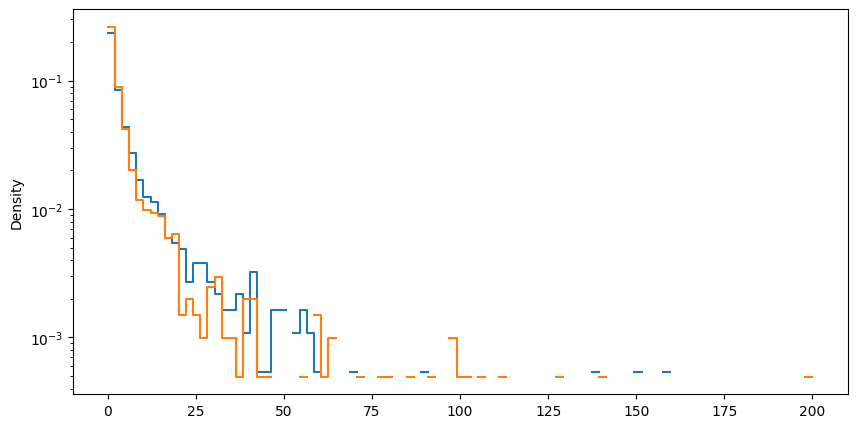

In [3]:
import seaborn as sns
pt = sample.target.continuous[...,0][sample.target.mask.squeeze(-1) > 0].cpu()
eta = sample.target.continuous[...,1][sample.target.mask.squeeze(-1) > 0].cpu()
phi = sample.target.continuous[...,2][sample.target.mask.squeeze(-1) > 0].cpu()

plt.figure(figsize=(10, 5))

bins = np.linspace(0,200,100)
sns.histplot(pt.detach().numpy(), bins=bins, stat='density', element='step', fill=False, log_scale=(False, True))
sns.histplot(test.continuous[...,0][test.mask.squeeze(-1) > 0].cpu().numpy(), bins=bins, stat='density', element='step', fill=False, log_scale=(False, True))


<Axes: ylabel='Density'>

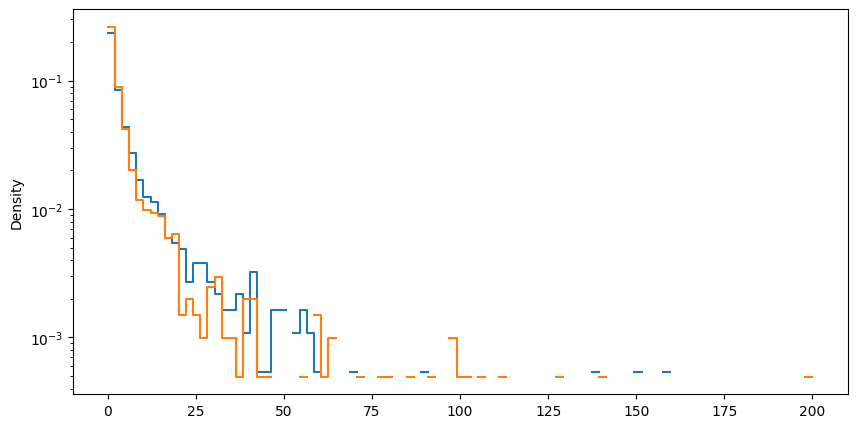

In [5]:
import seaborn as sns
pt = sample.target.continuous[...,0][sample.target.mask.squeeze(-1) > 0].cpu()
eta = sample.target.continuous[...,1][sample.target.mask.squeeze(-1) > 0].cpu()
phi = sample.target.continuous[...,2][sample.target.mask.squeeze(-1) > 0].cpu()

plt.figure(figsize=(10, 5))

bins = np.linspace(0,200,100)
sns.histplot(pt.detach().numpy(), bins=bins, stat='density', element='step', fill=False, log_scale=(False, True))
sns.histplot(test.continuous[...,0][test.mask.squeeze(-1) > 0].cpu().numpy(), bins=bins, stat='density', element='step', fill=False, log_scale=(False, True))


# Sample MMF

In [1]:
import numpy as np
import torch
import pytorch_lightning as L
import matplotlib.pyplot as plt

from utils.tensorclass import TensorMultiModal
from utils.aoj import AspenOpenJets 
from utils.datasets import MultiModalDataset, DataCoupling, data_coupling_collate_fn

from model.MMF import  MultiModalFlowBridge
from train_mmf import experiment_configs

experiment_id = "a58e828a3d384417b723c6ffd69175d3"
config = experiment_configs(f'/home/df630/Multimodal-flows/jet_sequences/{experiment_id}')

mmf = MultiModalFlowBridge.load_from_checkpoint(f"/home/df630/Multimodal-flows/jet_sequences/{experiment_id}/checkpoints/best.ckpt", config=config)
mmf.config.num_timesteps = 10
mmf.config.num_jets = 20
mmf.config.top_k = 8
mmf.config.top_p = None
mmf.config.temperature = 1.0
mmf.to('cuda:2')

#...dataset & dataloaders:

aoj = AspenOpenJets(data_dir="/home/df630/Multimodal-Bridges/data/aoj", data_files="RunG_batch1.h5")
test, metadata = aoj(num_jets=mmf.config.num_jets,
                     download=False,
                     features={"continuous": ['pt', 'eta_rel', 'phi_rel'], "discrete": 'tokens'},
                     pt_order=True,
                     padding='zeros')

gauss_noise = torch.randn_like(test.continuous) * test.mask
cat_noise = torch.randint_like(test.discrete, 1, 9) * test.mask
t0 = torch.full((len(test.mask),), mmf.config.time_eps)  # (B) t_0=eps

source = TensorMultiModal(continuous=gauss_noise, discrete=cat_noise ,mask=test.mask.clone(), time=t0)
source = source.to(mmf.device)


data = DataCoupling(source=source, target=TensorMultiModal())
mmf

/home/df630/Multimodal-flows/multimodal_flows/utils/aoj.py:98: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  list_discrete_feats.append(torch.tensor(feats[features["discrete"]]))


MultiModalFlowBridge(
  (model): MultiModalParticleFormer(
    (transformer): ModuleDict(
      (wxe): Sequential(
        (0): Linear(in_features=3, out_features=128, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
      (wte): Sequential(
        (0): Embedding(9, 128)
        (1): GELU(approximate='none')
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
      (drop): Dropout(p=0.0, inplace=False)
      (attn_blocks): ModuleList(
        (0-3): 4 x ConvexAttentionBlock(
          (ln1_x): LayerNorm()
          (ln1_y): LayerNorm()
          (self_attn_x): SelfAttention(
            (c_attn): Linear(in_features=128, out_features=384, bias=True)
            (c_proj): Linear(in_features=128, out_features=128, bias=True)
            (attn_dropout): Dropout(p=0.0, inplace=False)
            (resid_dropout): Dropout(p=0.0, inplace=False)
            (q_layernorm): LayerNorm()
            (k_

In [2]:
sample = mmf.simulate_dynamics(data)

mu = torch.tensor(mmf.config.metadata['mean']).to(mmf.device)
std = torch.tensor(mmf.config.metadata['std']).to(mmf.device)

sample.target.continuous = sample.target.continuous * std + mu

sample.target.apply_mask()

In [3]:
sample

DataCoupling(source=TensorMultiModal(time=tensor([1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05,
        1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05,
        1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05,
        1.0000e-05, 1.0000e-05], device='cuda:2'), continuous=tensor([[[-0.9278,  0.7065, -1.9342],
         [ 0.0249, -1.2437, -0.7211],
         [-1.0522,  0.3763,  1.1988],
         ...,
         [ 0.0000,  0.0000,  0.0000],
         [-0.0000, -0.0000, -0.0000],
         [-0.0000,  0.0000, -0.0000]],

        [[ 1.2268,  0.0806,  0.3107],
         [-0.6230, -0.2858,  1.5198],
         [-0.9915, -1.2185, -1.3515],
         ...,
         [-0.0000,  0.0000, -0.0000],
         [-0.0000, -0.0000, -0.0000],
         [ 0.0000, -0.0000,  0.0000]],

        [[-0.0703,  0.3856,  0.0197],
         [ 0.9757,  0.7063, -0.7049],
         [ 0.1611, -0.0867, -0.5430],
         ...,
         [-0.0000,  0.0000,  0.0000],
  

<Axes: ylabel='Density'>

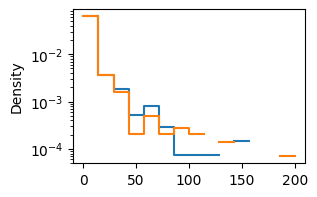

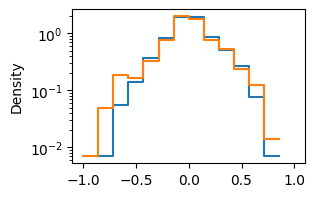

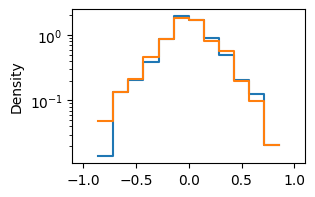

In [7]:
import seaborn as sns
pt = sample.target.continuous[...,0][sample.target.mask.squeeze(-1) > 0].cpu()
eta = sample.target.continuous[...,1][sample.target.mask.squeeze(-1) > 0].cpu()
phi = sample.target.continuous[...,2][sample.target.mask.squeeze(-1) > 0].cpu()

plt.figure(figsize=(3, 2))
bins = np.linspace(0,200,15)
sns.histplot(pt.detach().numpy(), bins=bins, stat='density', element='step', fill=False, log_scale=(False, True))
sns.histplot(test.continuous[...,0][test.mask.squeeze(-1) > 0].cpu().numpy(), bins=bins, stat='density', element='step', fill=False, log_scale=(False, True))

plt.figure(figsize=(3, 2))
bins = np.linspace(-1,1,15)
sns.histplot(eta.detach().numpy(), bins=bins, stat='density', element='step', fill=False, log_scale=(False, True))
sns.histplot(test.continuous[...,1][test.mask.squeeze(-1) > 0].cpu().numpy(), bins=bins, stat='density', element='step', fill=False, log_scale=(False, True))

plt.figure(figsize=(3, 2))
bins = np.linspace(-1,1,15)
sns.histplot(phi.detach().numpy(), bins=bins, stat='density', element='step', fill=False, log_scale=(False, True))
sns.histplot(test.continuous[...,2][test.mask.squeeze(-1) > 0].cpu().numpy(), bins=bins, stat='density', element='step', fill=False, log_scale=(False, True))

